Import Libraries

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
from PIL import Image

[*********************100%%**********************]  1 of 1 completed


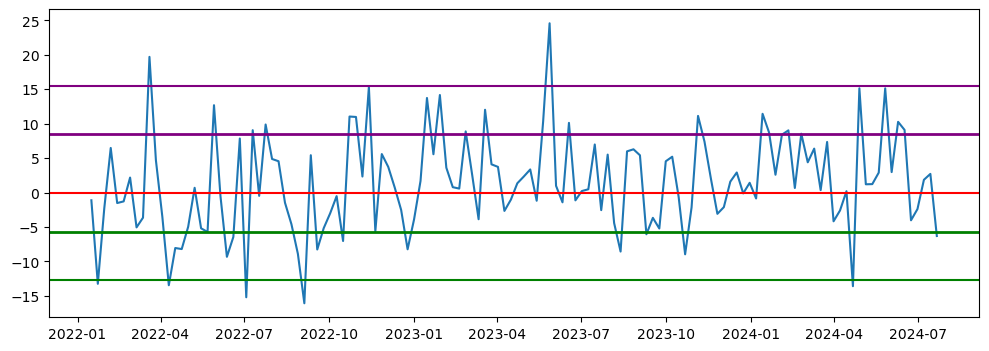

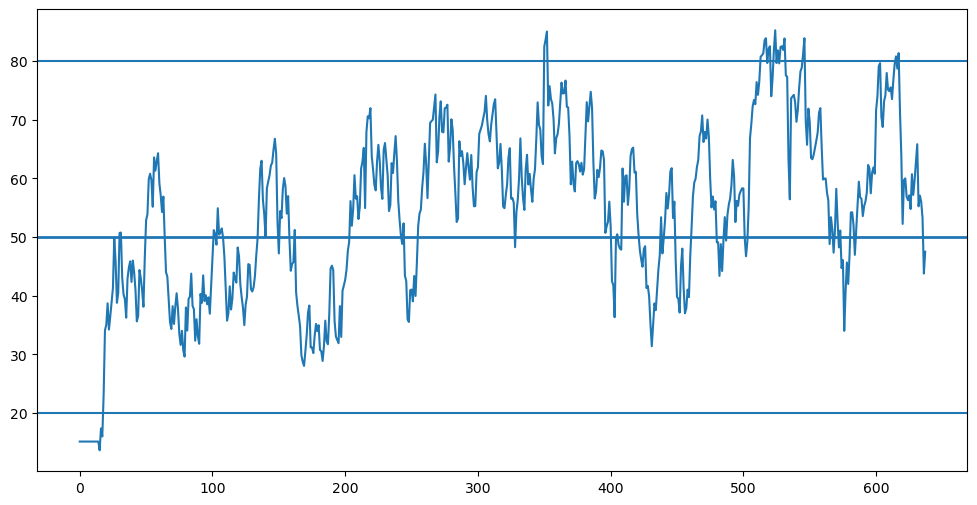

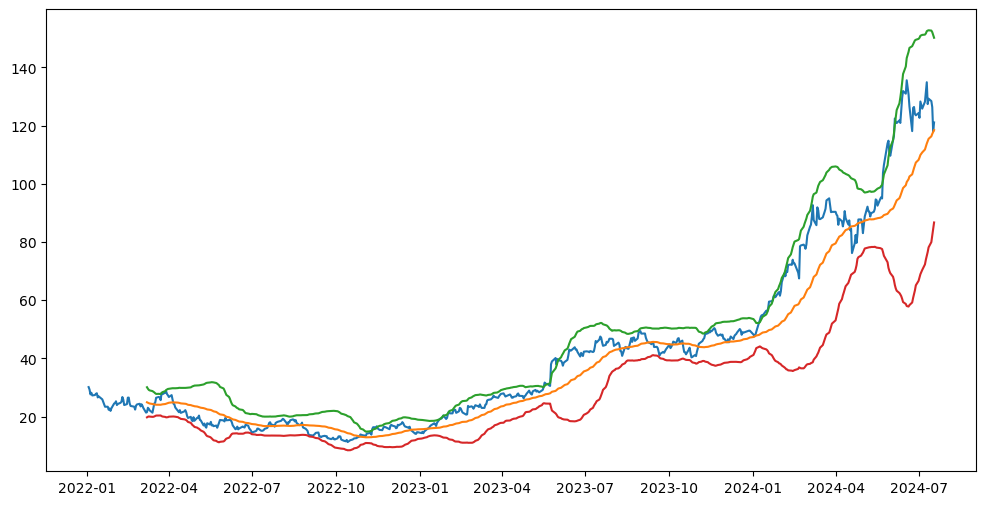

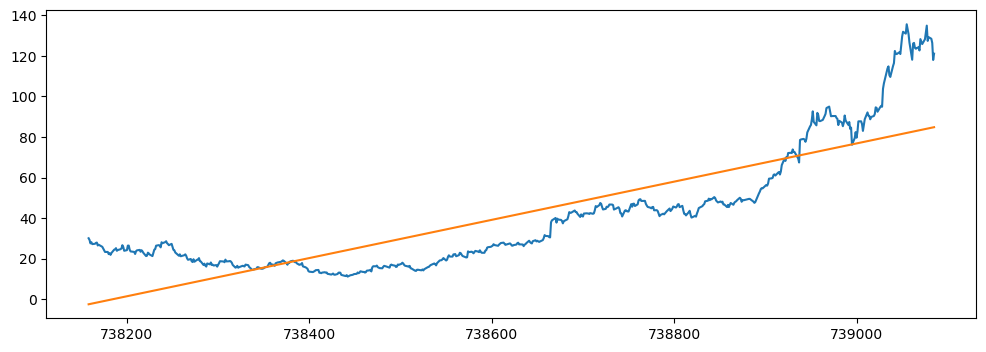

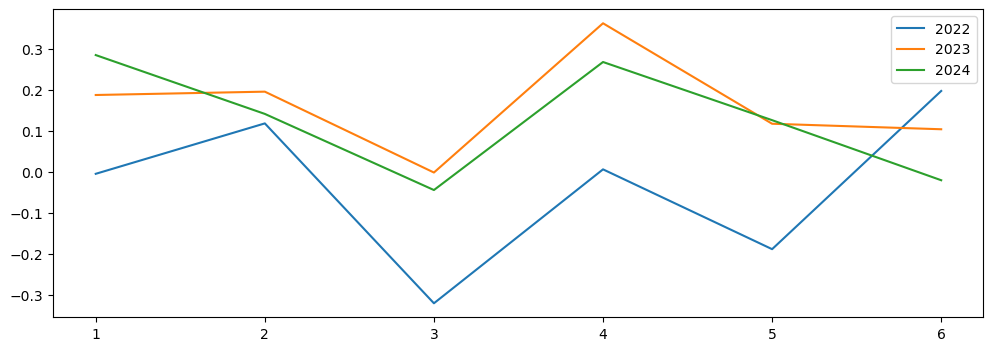

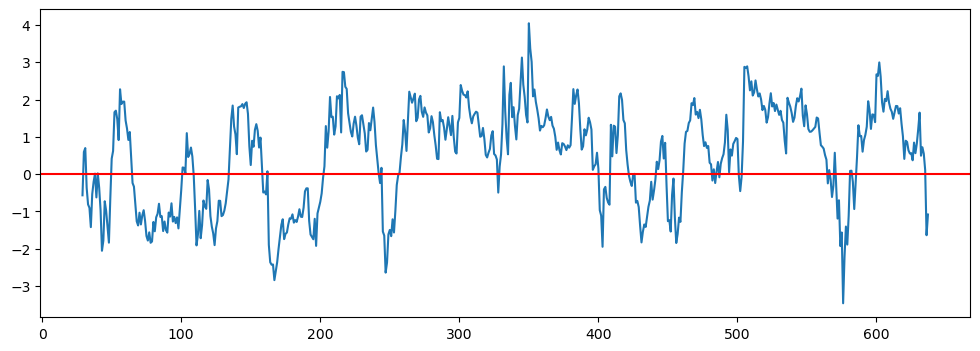

In [257]:
# List of stock
tickers = ['NVDA']
for stock in tickers:
    # Ticker = "ICICIBANK.NS"
    start_date = "2022-01-01"
    end_date = "2024-12-31"
    download_data = yf.download(tickers= stock, start=start_date, end=end_date)
    data = pd.DataFrame(download_data['Close'])
    return_final_output(data,stock)
    # plt.savefig(f"../top_50/{stock}.png")
    save_outcome_image(stock)

In [228]:
def save_outcome_image(stock):
    
    Image1 = Image.open(f'../BB/{stock}.png')
    Image2 = Image.open(f'../LR/{stock}.png')
    Image3 = Image.open(f'../MONTHLY_RETURN/{stock}.png')
    Image4 = Image.open(f'../SEASONALITY/{stock}.png')
    Image5 = Image.open(f'../RSI/{stock}.png')
    Image6 = Image.open(f'../STANDARIZED/{stock}.png')
    
    new_image = Image.new('RGBA',size=(1200, 3600))
    new_image.paste(Image1, (0,0))
    new_image.paste(Image2, (0,600))
    new_image.paste(Image3, (0,1200))
    new_image.paste(Image4, (0,1800))
    new_image.paste(Image5, (0,2400))
    new_image.paste(Image5, (0,3000))
    new_image.save(f"../top_50/{stock}.png")

In [229]:
Ticker = "ICICIBANK.NS"
start_date = "2021-01-01"
end_date = "2024-12-31"
download_data = yf.download(tickers= Ticker, start=start_date, end=end_date)
data = pd.DataFrame(download_data['Close'])
# data

[*********************100%%**********************]  1 of 1 completed


Load data

In [230]:
def return_final_output(df, ticker):
    a = {}
    a["MONTHLY_RETURN"]= create_monthly_return(df,ticker)
    a['RSI'] = calculate_rsi(ticker, df)
    a['BB'] = create_bb(df, ticker)
    a["LR"] = create_LR(df,ticker) 
    a["SEASONALITY"] = return_seasonality(df,ticker)
    a['STANDARIZED'] = standardized_price(df,ticker)
    
    return a

{'MONTHLY_RETURN': None,
 'RSI': None,
 'BB': None,
 'LR': None,
 'SEASONALITY': None,
 'STANDARIZED': None}

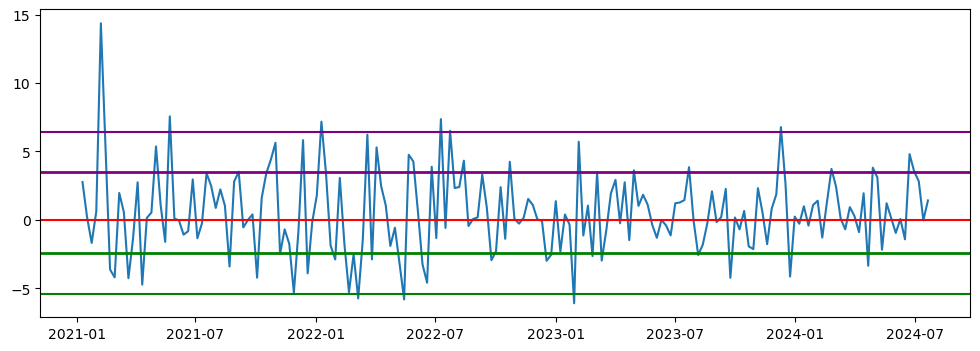

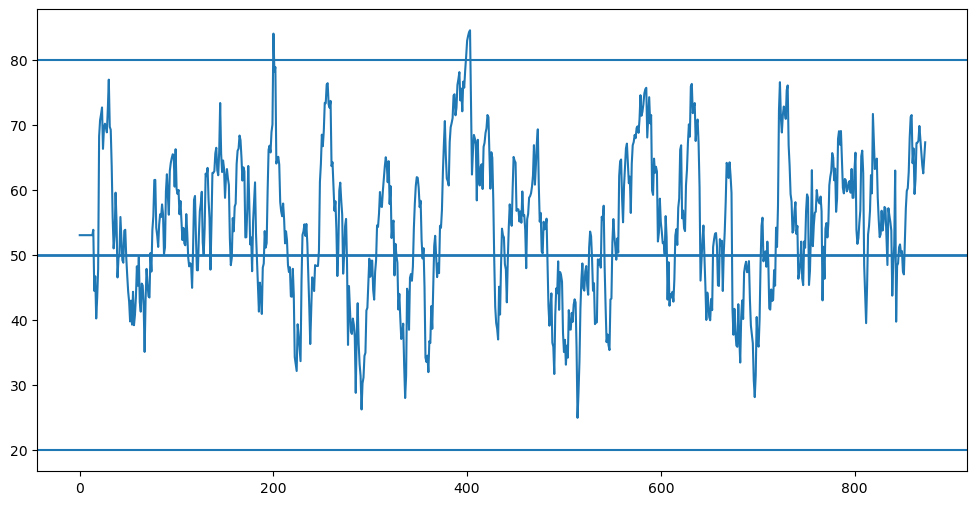

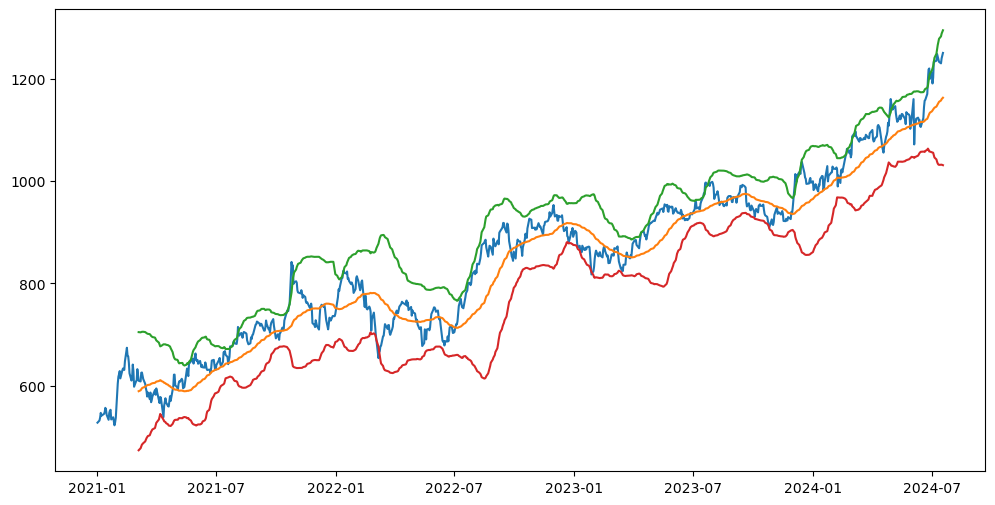

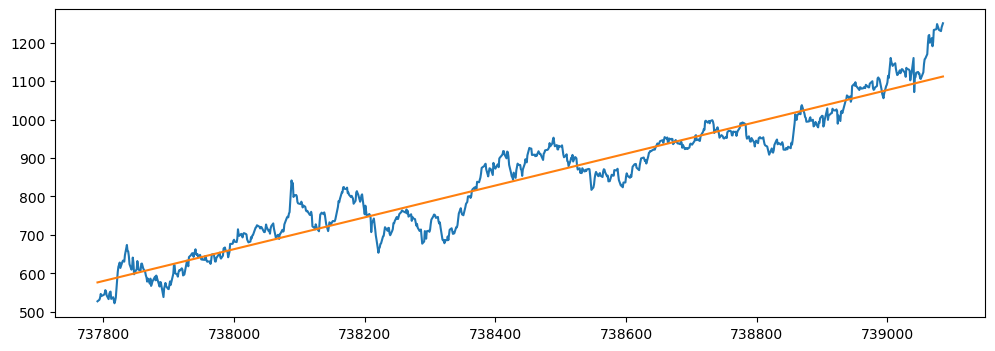

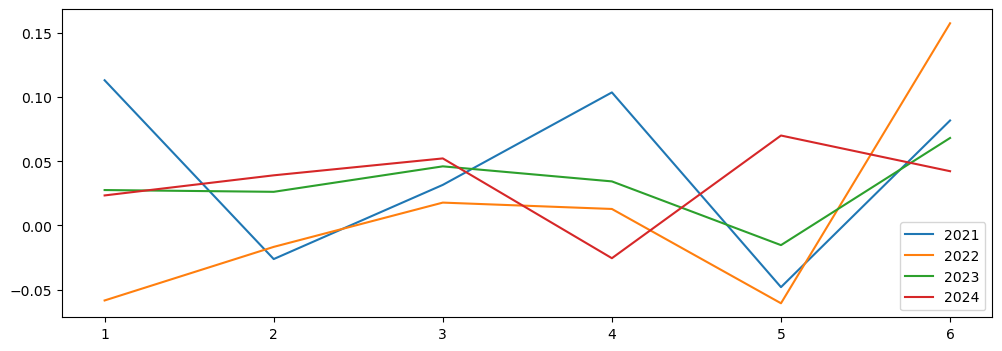

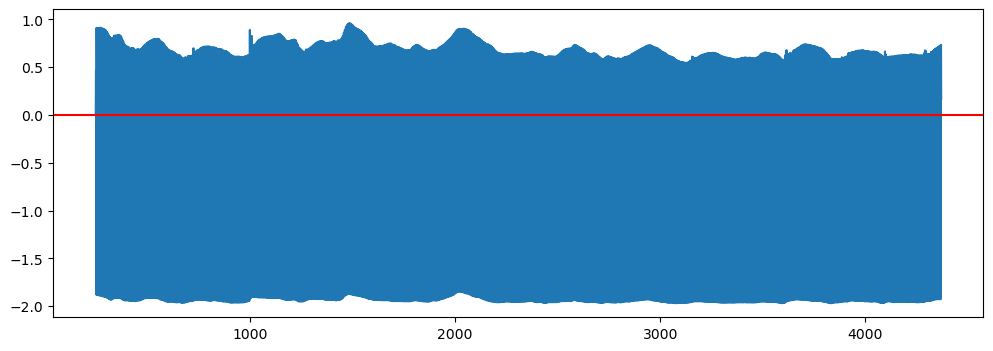

In [231]:
fig = return_final_output(data,"ICICIBANK")
# plt.savefig("../top_50/test.png")
fig

In [232]:
# Ticker_list = ["VBL.NS", "ICICIBANK.NS", "RELIANCE.NS"]

# for value in Ticker_list:
#     download_data = yf.download(tickers= Ticker, start=start_date, end=end_date)
#     data = pd.DataFrame(download_data['Close'])
#     return_final_output(data)

Draw 2 Standard Deviation plot

In [233]:
def create_bb(data, ticker):
    data['rolling_mean'] = data['Close'].rolling(45).mean()
    data['rolling_std'] = data['Close'].rolling(45).std()
    data['2UP'] = data['rolling_mean'] + 2.5*data['rolling_std']
    data['2DOWN'] = data['rolling_mean'] - 2.5*data['rolling_std']
    plt.figure(figsize=(12,6))
    plt.plot(data['Close'])
    plt.plot(data['rolling_mean'])
    plt.plot(data['2UP'])
    plt.plot(data['2DOWN'])
    # return fig
    plt.savefig(f"../BB/{ticker}.png")

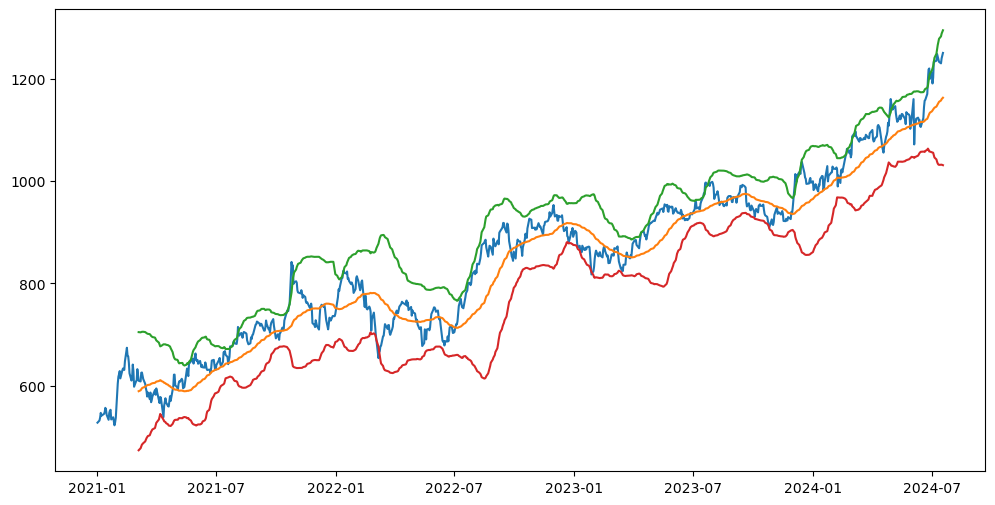

In [234]:
# df = data['Close']
# df = pd.DataFrame(df)
create_bb(data, 'ICICIBANK')

Weekly returns

In [235]:

def create_monthly_return(df,ticker):
    weekly_data = data['Close'].resample('W', label='left').ffill().pct_change()*100
    plt.figure(figsize=(12,4))
    plt.plot(weekly_data)
    plt.axhline(0, color = 'red')
    plt.axhline(np.mean(weekly_data) + np.std(weekly_data), color='purple', linewidth=2);
    plt.axhline(np.mean(weekly_data) - np.std(weekly_data), color='green', linewidth=2);
    plt.axhline(np.mean(weekly_data) + 2* np.std(weekly_data), color='purple');
    plt.axhline(np.mean(weekly_data) - 2*np.std(weekly_data), color='green')
    # return fig
    plt.savefig(f"../MONTHLY_RETURN/{ticker}.png")

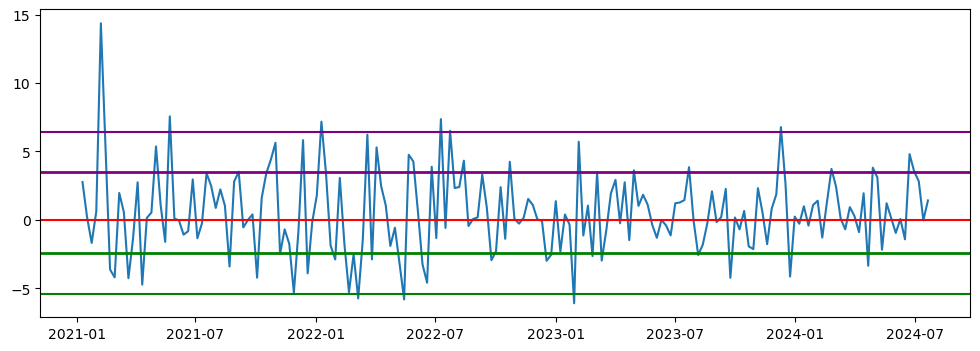

In [236]:
create_monthly_return(data, "ICICBANK")

Linear Regression

In [237]:
def create_LR(df,ticker):
    y = np.array(data['Close'])
    X = pd.to_datetime(data['Close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    # fig = go.Figure()
    # fig.add_trace(go.Scatter(x=X,y=y,mode = 'lines',name = 'Close'))
    # fig.add_trace(go.Scatter(x=X,y=slope*X+intercept, mode = 'lines',line=dict(color='Red'), name= "RegressionLine"))
    # fig.update_layout(autosize=True,width=1000,height=400)
    # # return fig
    # fig.write_image("../LR/test.png")
    plt.figure(figsize=(12,4))
    plt.plot(X,y)
    plt.plot(X,slope*X+intercept)
    plt.savefig(f"../LR/{ticker}.png")

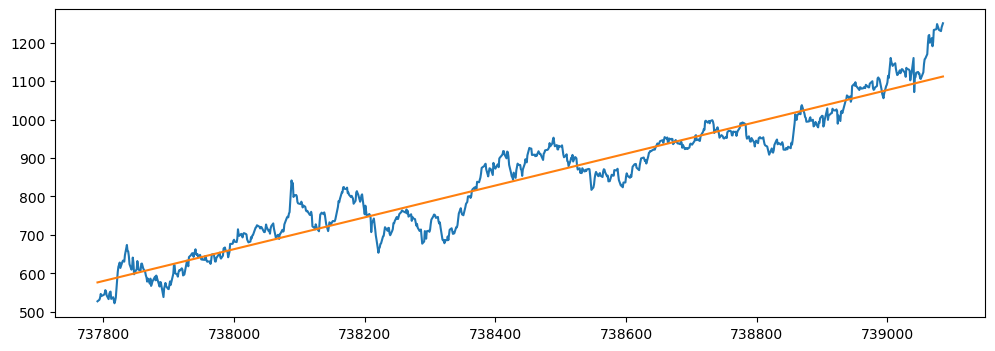

In [238]:
create_LR(data, 'ICICIBANK')

In [239]:
def return_seasonality(data, ticker):
    '''This return the monthly return of the ticker
    '''
    data = data['Close'].resample("M").ffill().pct_change()
    data = pd.DataFrame(data)
    data['date'] = data.index
    data['year'] = data.index.year
    
    new_df = pd.DataFrame()
    for value in data['year'].unique():
        # print(value)
        new_df[str(value)] = pd.Series(data[data['year']==value]['Close'].values)
        value+=1

        new_df = new_df.dropna()
    plt.figure(figsize=(12,4))
    plt.plot(new_df)
    plt.legend(new_df, loc='best')
    plt.savefig(f"../SEASONALITY/{ticker}.png");

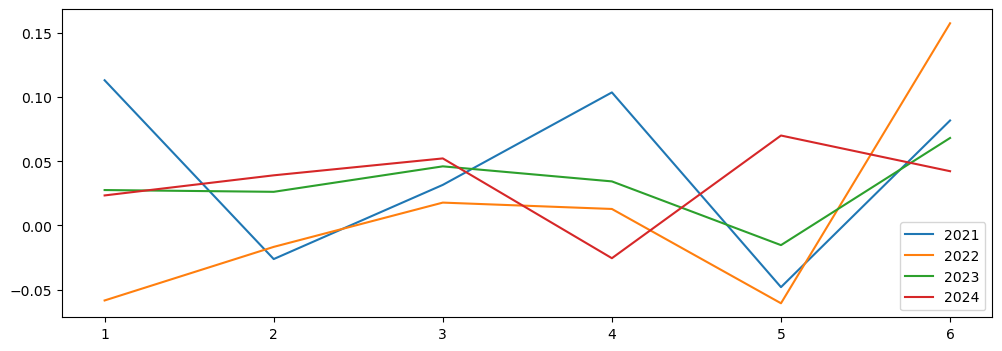

In [240]:
# px.line(return_seasonality(data))
return_seasonality(data,'ICICIBANK');

In [241]:
def calculate_rsi(ticker,prices, window=14):
    """
    Calculate the Relative Strength Index (RSI) for given prices.

    Parameters:
    - prices: List or numpy array of prices.
    - window: Window length for RSI calculation (default is 14).

    Returns:
    - rsi: Numpy array of RSI values.
    """
    prices = prices['Close']
    deltas = np.diff(prices)
    seed = deltas[:window+1]
    up = seed[seed >= 0].sum() / window
    down = -seed[seed < 0].sum() / window
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:window] = 100. - 100. / (1. + rs)

    for i in range(window, len(prices)):
        delta = deltas[i - 1]

        if delta > 0:
            gain = delta
            loss = 0.
        else:
            gain = 0.
            loss = -delta

        up = (up * (window - 1) + gain) / window
        down = (down * (window - 1) + loss) / window

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)
    plt.figure(figsize=(12,6))
    plt.axhline(80)
    plt.axhline(50, lw = 2)
    plt.axhline(20)
    plt.plot(rsi)
    plt.savefig(f"../RSI/{ticker}.png");

In [251]:
data

,Close,rolling_mean,rolling_std,2UP,2DOWN
Date,,,,,
2021-01-01,527.500000,NaN,NaN,NaN,NaN
2021-01-04,531.700012,NaN,NaN,NaN,NaN
2021-01-05,537.250000,NaN,NaN,NaN,NaN
2021-01-06,546.700012,NaN,NaN,NaN,NaN
2021-01-07,541.099976,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-07-11,1238.449951,1152.281106,48.035780,1272.370556,1032.191656
2024-07-12,1232.900024,1154.723329,49.290608,1277.949849,1031.496809
2024-07-15,1229.949951,1157.262218,50.169479,1282.685915,1031.838521


In [252]:
# Standardization 
def standardized_price(df, ticker):
    df = df['Close']
    close = np.array(df).reshape(-1)
    mean = pd.Series(close).rolling(30).mean()
    std = pd.Series(close).rolling(30).std()
    plt.figure(figsize=(12,4))
    plt.plot((close - mean)/std)
    plt.axhline(0, color='red')
    plt.savefig(f"../STANDARIZED/{ticker}.png")

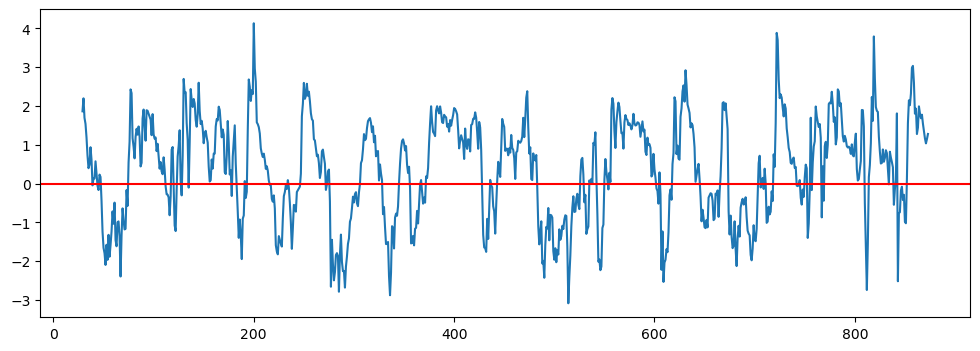

In [254]:
# df = data['Close']
standardized_price(data, 'stock')


In [244]:
# calculate_rsi('stock',df)

In [245]:
np.array(df).reshape(-1)

array([ 527.5       ,  531.70001221,  537.25      ,  546.70001221,
        541.09997559,  542.04998779,  544.70001221,  548.        ,
        556.5       ,  553.29998779,  543.        ,  533.15002441,
        546.45001221,  551.        ,  552.70001221,  533.79998779,
        538.04998779,  522.34997559,  528.25      ,  537.        ,
        603.79998779,  617.34997559,  622.34997559,  628.29998779,
        614.15002441,  629.59997559,  633.34997559,  632.15002441,
        630.65002441,  647.59997559,  673.95001221,  658.34997559,
        657.34997559,  644.65002441,  624.04998779,  609.84997559,
        616.29998779,  641.09997559,  628.        ,  597.75      ,
        608.34997559,  610.5       ,  632.09997559,  620.75      ,
        609.45001221,  608.04998779,  625.09997559,  625.59997559,
        612.84997559,  603.5       ,  594.95001221,  589.5       ,
        578.59997559,  586.65002441,  573.45001221,  586.40002441,
        567.5       ,  571.54998779,  578.54998779,  591.45001

In [246]:
pd.Series(df).rolling(30).mean().shape

(874,)